# SVM Classifier on the cleaned Credit Score dataset

Imports

In [6]:
import pickle
import pandas as pd
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


Loading Dataset

In [7]:
x_train = pd.read_csv("../Dataset//x_train.csv")
y_train = pd.read_csv("../Dataset//y_train.csv")

x_test = pd.read_csv("../Dataset//x_test.csv")
y_test = pd.read_csv("../Dataset//y_test.csv")

Fitting Model

In [8]:
sv = svm.SVC(kernel='rbf',C=0.5,decision_function_shape='ovo') 
sv.fit(x_train, y_train)

c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.5, decision_function_shape='ovo')

Performance Metrics

              precision    recall  f1-score   support

           0       0.50      0.65      0.56       353
           1       1.00      0.00      0.00       169
           2       0.77      0.82      0.80       884

    accuracy                           0.68      1406
   macro avg       0.76      0.49      0.45      1406
weighted avg       0.73      0.68      0.64      1406


Accuracy: 0.6806543385490754
Precision: 0.4223609788490937
Recall: 0.49018432825298347
F1: 0.45279343719060033


c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


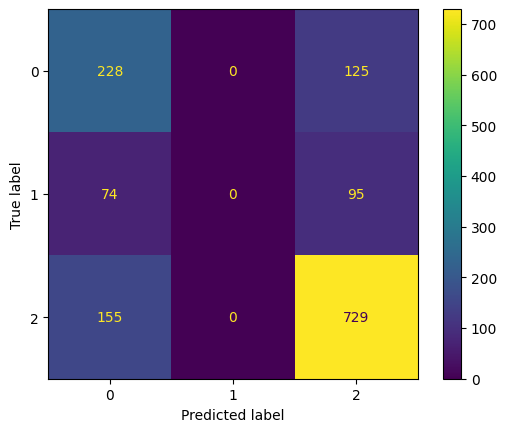

In [9]:
y_pred = sv.predict(x_test)

# y_val = clf.predict(x_train)
# print(classification_report(y_train, y_val))

print(classification_report(y_test, y_pred,zero_division=1))

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average="macro")
recall = recall_score(y_test, y_pred,average="macro")
f1 = f1_score(y_test, y_pred,average="macro")


print("\nAccuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)


cm = confusion_matrix(y_test, y_pred, labels=sv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=sv.classes_)
disp.plot()


Importing model as pickle

In [11]:
pickle.dump(sv, open('../Models//svm.pkl', 'wb'))